In [3]:
import numpy as np
from scipy.io import loadmat
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from math import sqrt
import csv

In [4]:
with open('./simplevqdata.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
data_array = np.array(data, dtype=float)

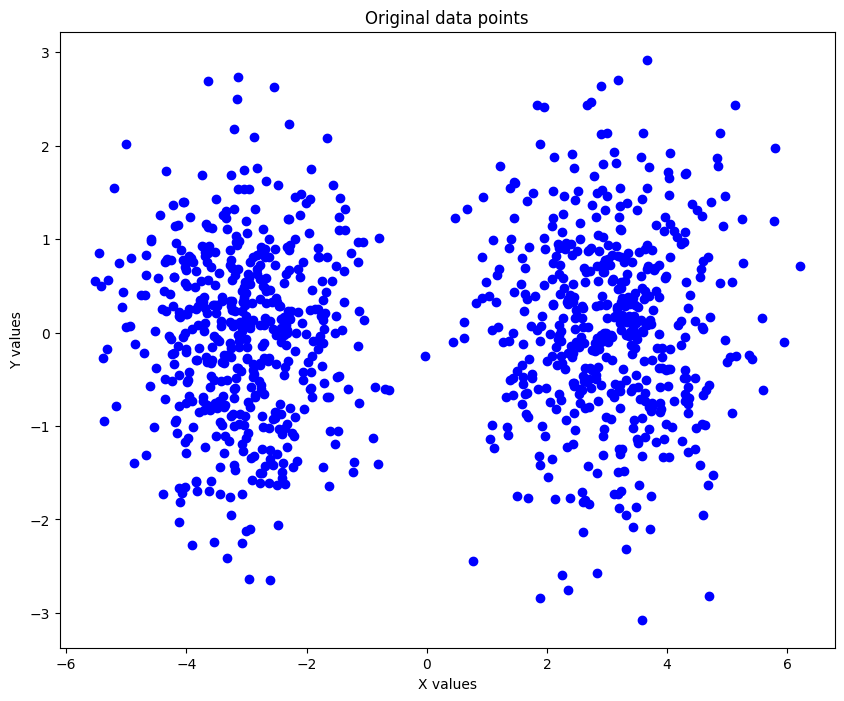

In [5]:
# visualize data
fig = plt.figure(figsize=(10, 8))
plot = fig.add_subplot()
plot.scatter(data_array[:,0],data_array[:,1], c="blue", marker='o', label='Data Points')
plot.set_xlabel('X values')
plot.set_ylabel('Y values')
plot.set_title('Original data points')
plt.show()

In [25]:
#Current version

def VQ(prototype_no, learning_rate, max_epochs, data_array, initial_prototypes=None):

  # sub methods
  def place_vector():
    if initial_prototypes is not None:
      return initial_prototypes
    indices = np.random.choice(len(data_array),prototype_no) #choose the random index
    prototype_vectors = data_array[indices] #return group of prototype vectors
    return prototype_vectors

  def move_vector(permuted_data,prototype_vectors):
    new_prototypes = np.copy(prototype_vectors)
    #new_prototype_vectors = np.empty((prototype_no,2)) #create empty new array for vector (replacing after epoch)
    for i in range(len(permuted_data)):
      #pick a data points -> example
      example_point = permuted_data[i]
      #find cloest vector to example
      distances = []
      for proto in prototype_vectors:
        dist = np.linalg.norm(example_point - proto)
        distances.append(dist)

      winner_index = np.argmin(distances)
      winner = prototype_vectors[winner_index]

      step = learning_rate * (example_point - winner) # update step vector
      new_prototypes[winner_index] = winner + step # update winner by step

    return new_prototypes

  def quantization_error(prototype_vectors):
    total_distances = 0.0
    for i in range(len(data_array)):
        dist = np.linalg.norm(data_array[i] - prototype_vectors)
        total_distances += pow(np.min(dist),2)
    return total_distances / len(data_array)

  def plotting(epoch_idx):
    fig = plt.figure(figsize=(10, 8))
    plot = fig.add_subplot()
    plot.scatter(data_array[:,0],data_array[:,1], c="blue", marker='o', label='Data Points')
    plot.scatter(prototype_vectors[:,0],prototype_vectors[:,1], c="red", marker='o', label='Data Points')
    plot.set_xlabel('X values')
    plot.set_ylabel('Y values')
    plot.set_title('Iteration: '+str(epoch_idx))
    plt.show()


  # runtime
  prototype_vectors = place_vector()

  trajectories = []
  for prot in prototype_vectors:
    traj = [[prot[0]], [prot[1]]]
    trajectories.append(traj)

  Hvq = []

  for epoch_idx in range(max_epochs):
    permuted_data = np.random.permutation(data_array)
    new_prototypes = move_vector(permuted_data,prototype_vectors)
    prototype_vectors=new_prototypes

    # update trajectories
    for i, prot in enumerate(prototype_vectors):
      trajectories[i][0].append(prot[0])
      trajectories[i][1].append(prot[1])

    # plotting(epoch_idx)
    Hvq.append(quantization_error(prototype_vectors))


  #plot learning curve
  plt.figure(figsize=(10, 6))
  plt.plot(range(1, max_epochs + 1), Hvq, label='Vector Quantization Error', color='green')
  plt.xlabel('Iterations')
  plt.ylabel('Vector Quantization Error')
  plt.title(f'Vector Quantization Error for K={prototype_no}, learning rate={learning_rate}, over {max_epochs} Iterations')
  plt.legend()
  plt.grid(True)
  plt.show()

  return (trajectories)


def plot_trajectories(data_array, trajectories, K, max_epochs, learning_rate):
  fig = plt.figure(figsize=(12, 10))
  plot = fig.add_subplot()
  plot.scatter(data_array[:,0],data_array[:,1], c="blue", marker='o', label='Data Points')
  plot.set_xlabel('X values')
  plot.set_ylabel('Y values')
  plot.set_title(f'Trajectories for K={K}, # Epochs={str(max_epochs)}, Learning Rate={str(learning_rate)}')

  for i,t in enumerate(trajectories):
    x=t[0]
    y=t[1]
    plot.plot(x, y, marker='o', label=f'Prototype Trajectory of Prot {i}')

  fig.legend()
  fig.show()


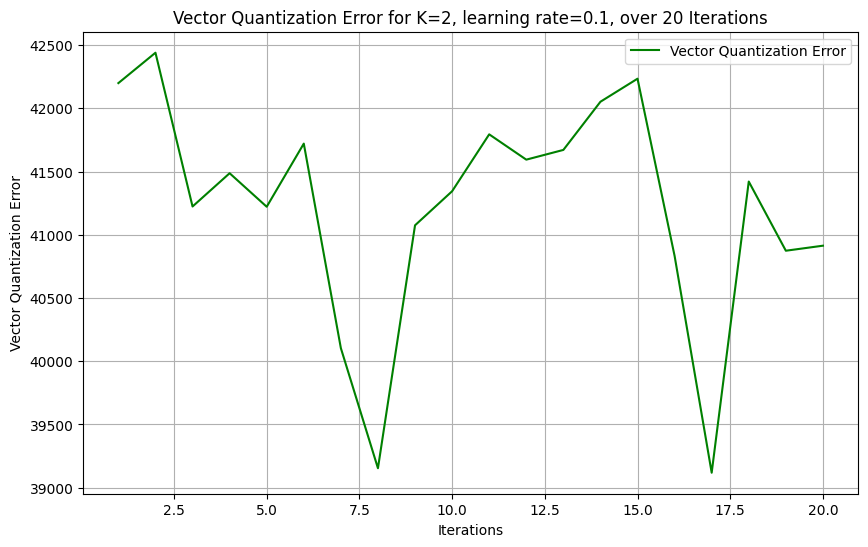

/var/folders/hr/622sc4x53h1457kksyx5ttk80000gn/T/ipykernel_53604/1060294380.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


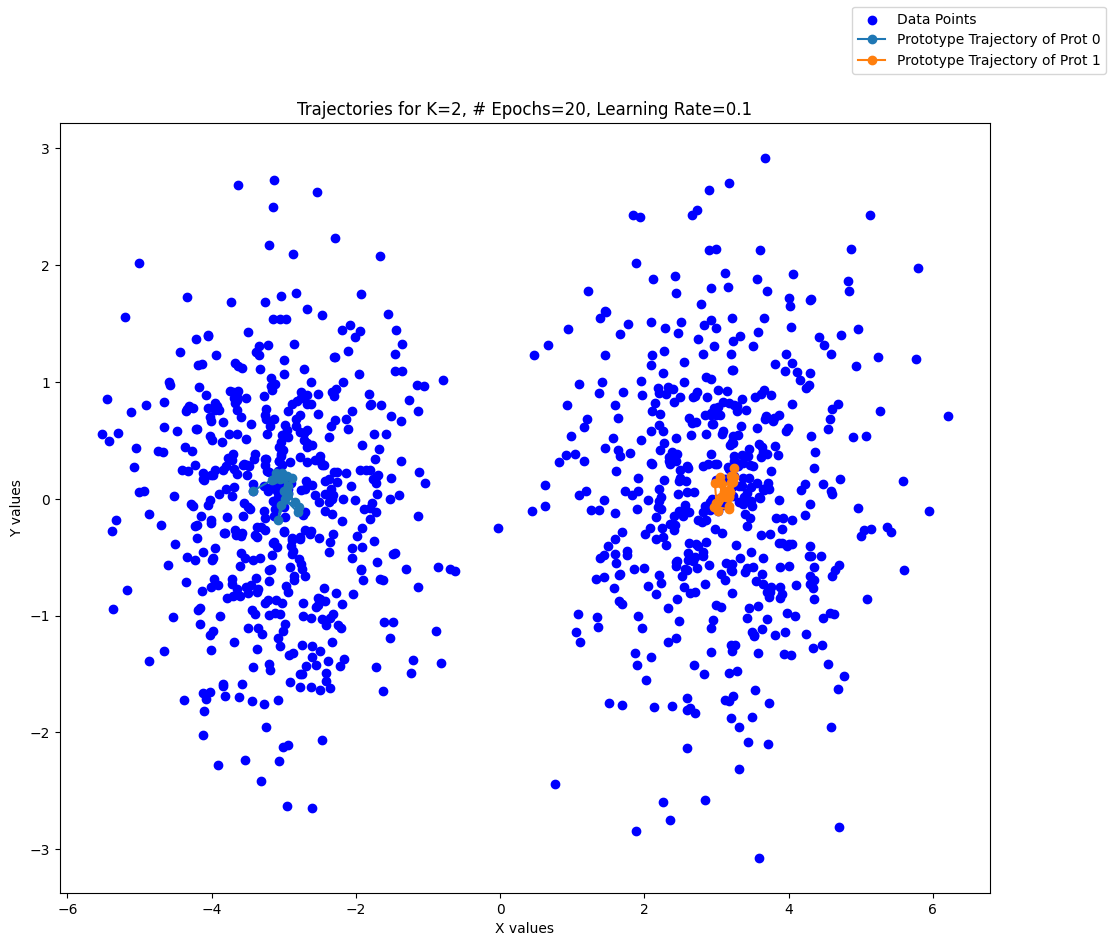

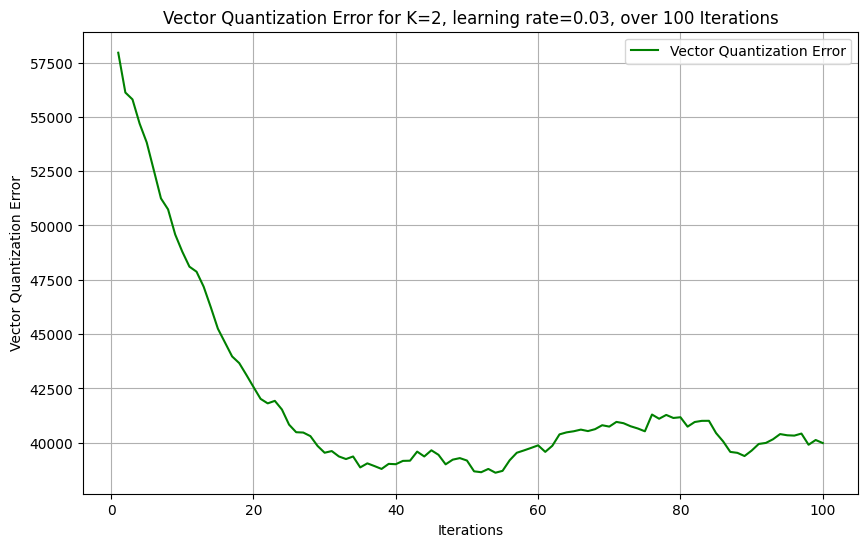

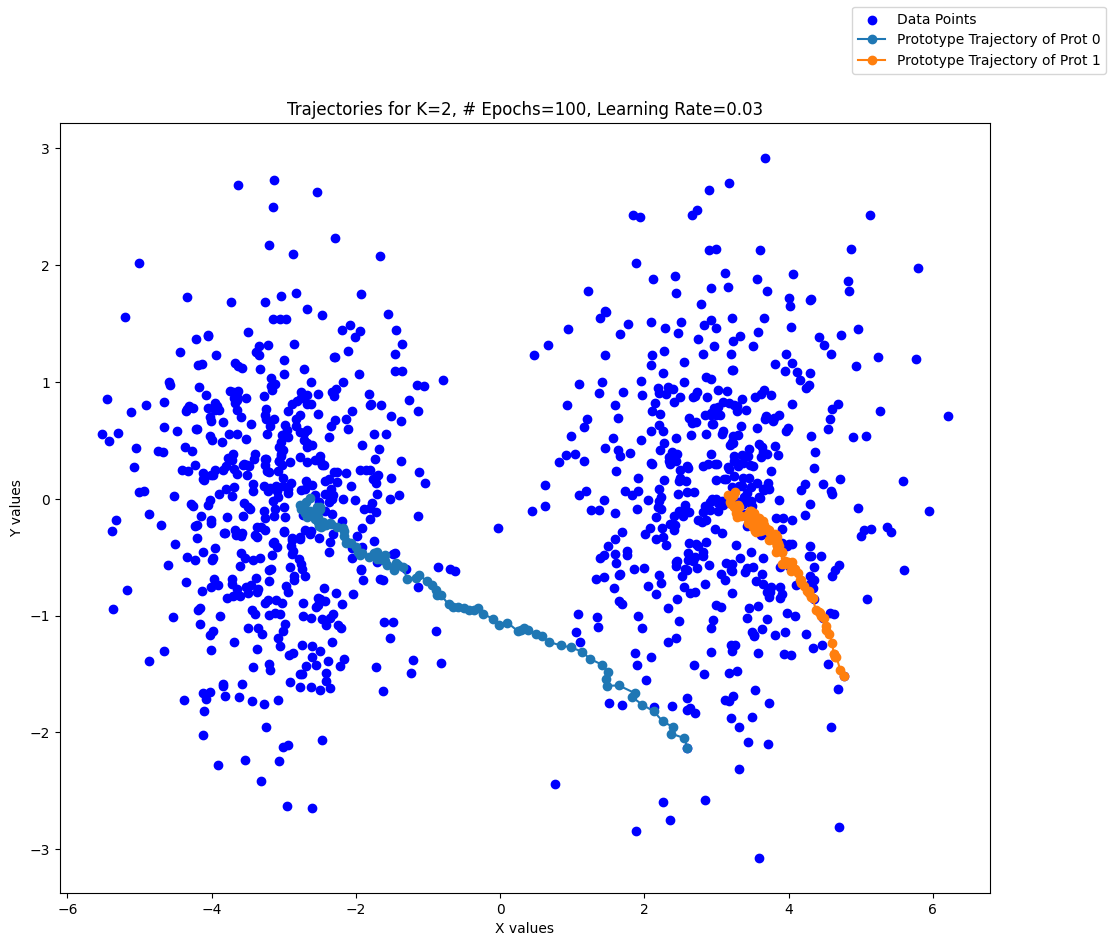

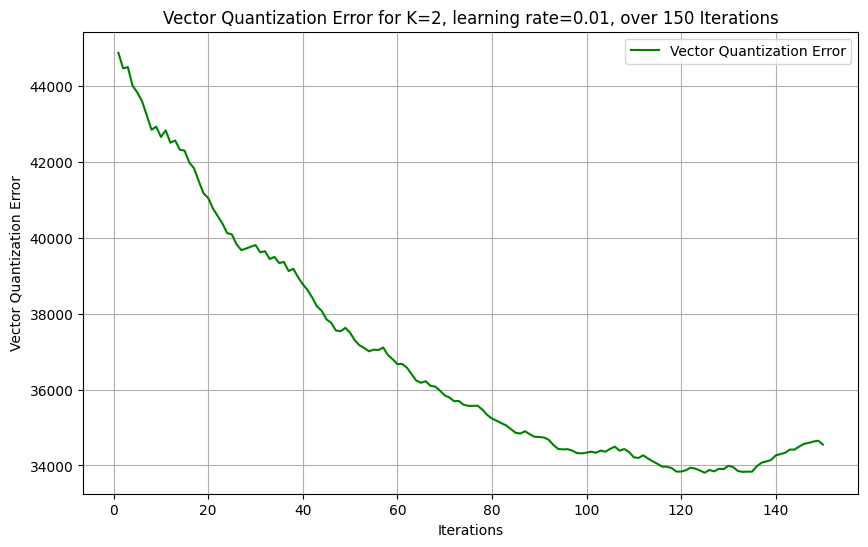

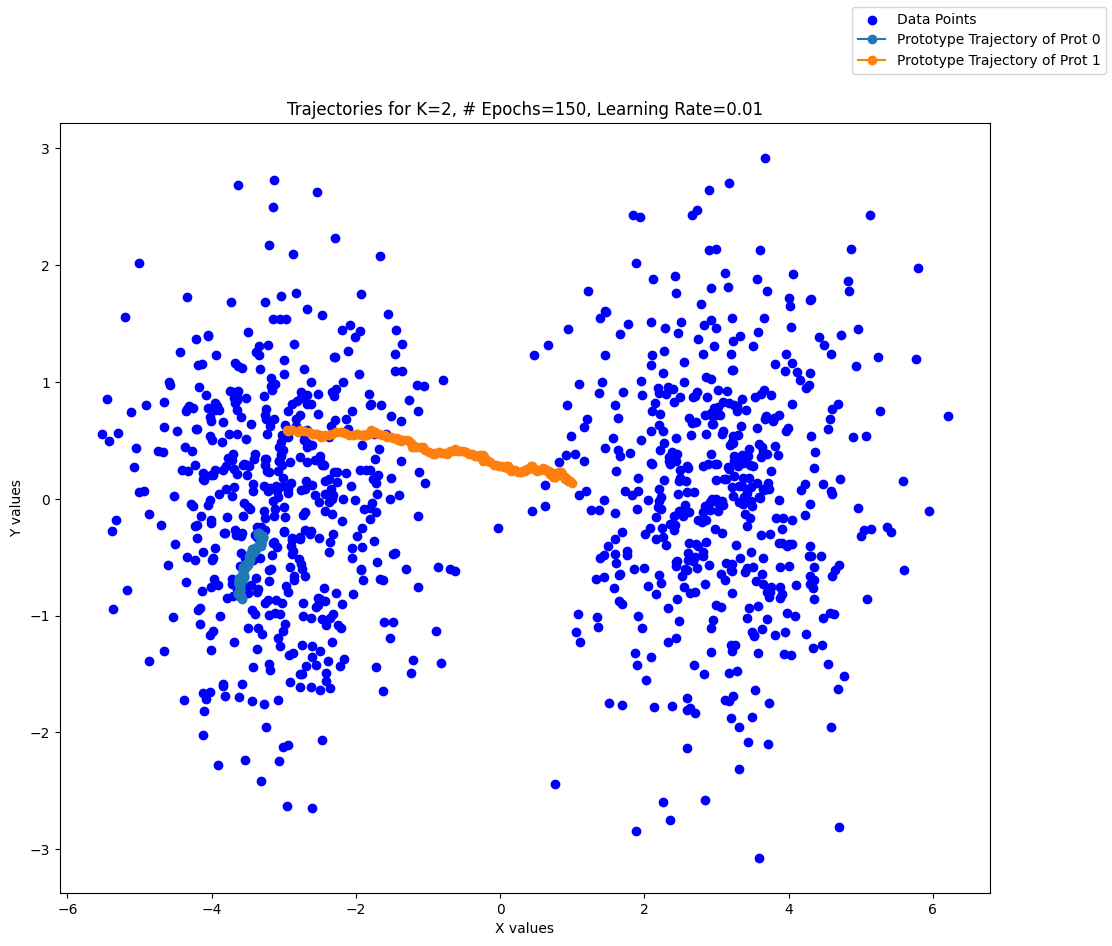

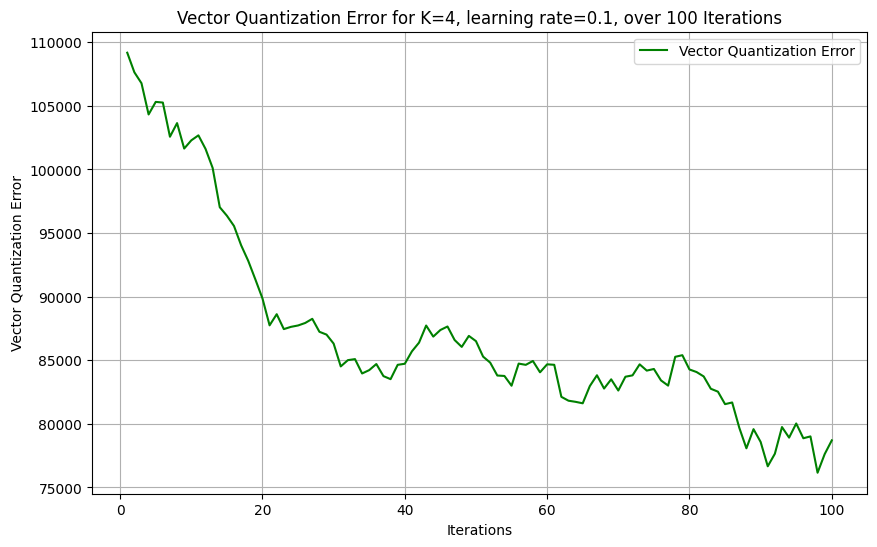

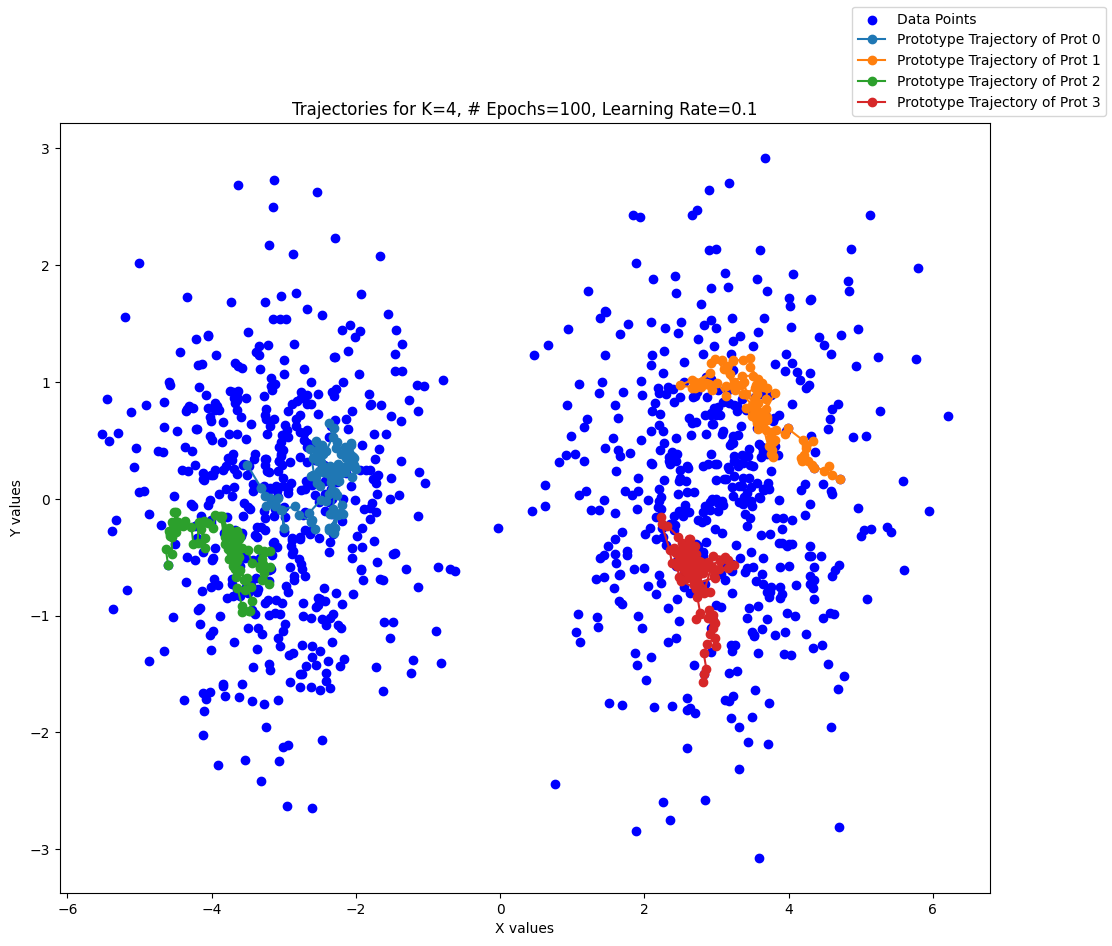

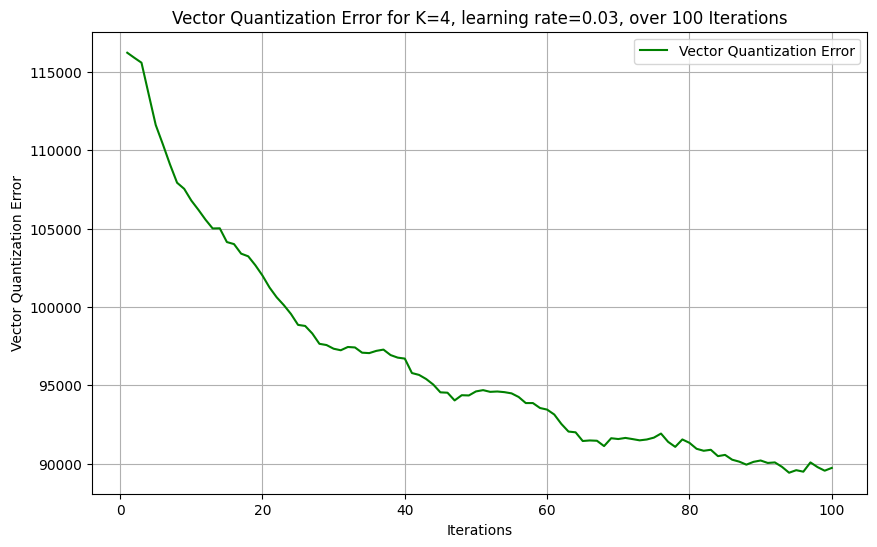

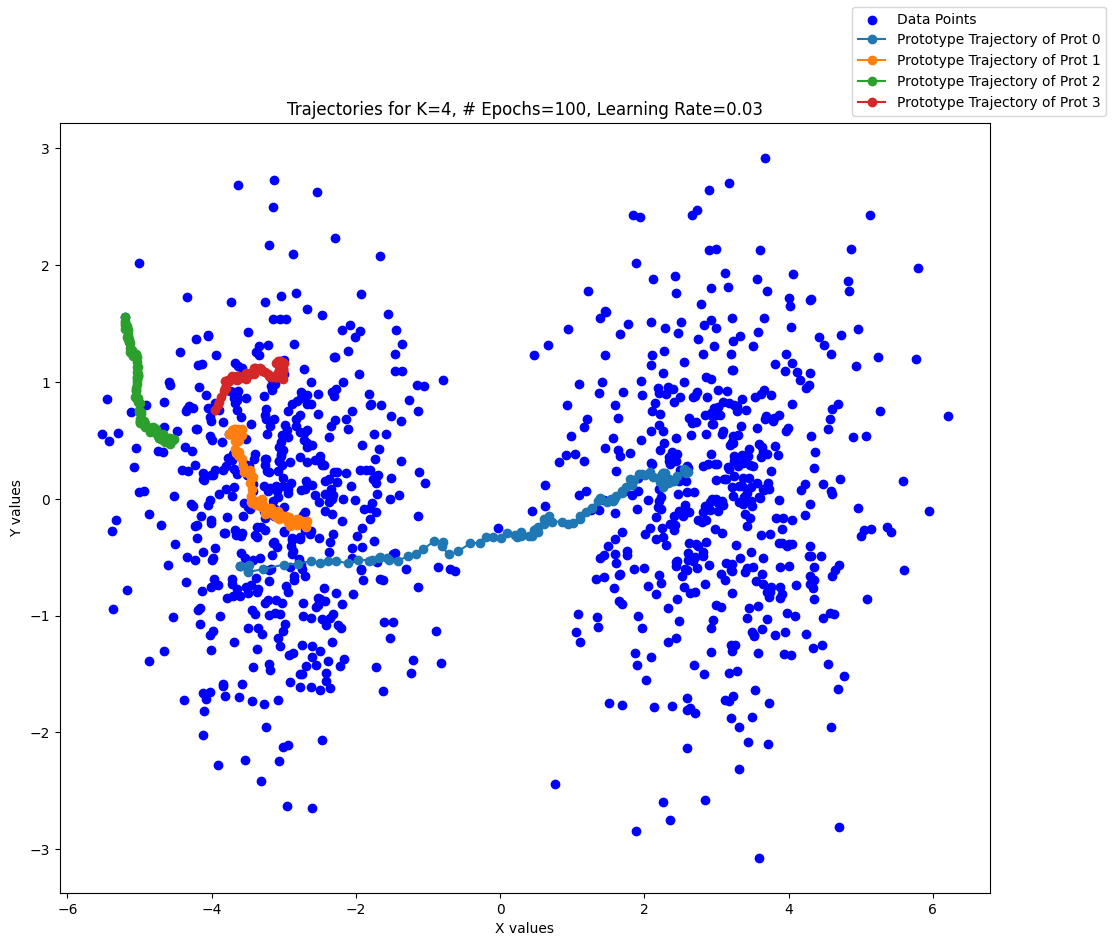

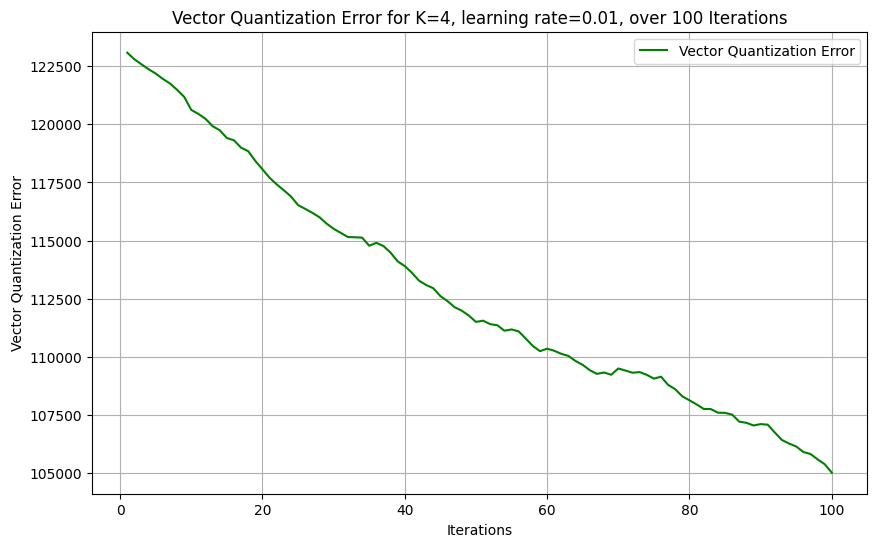

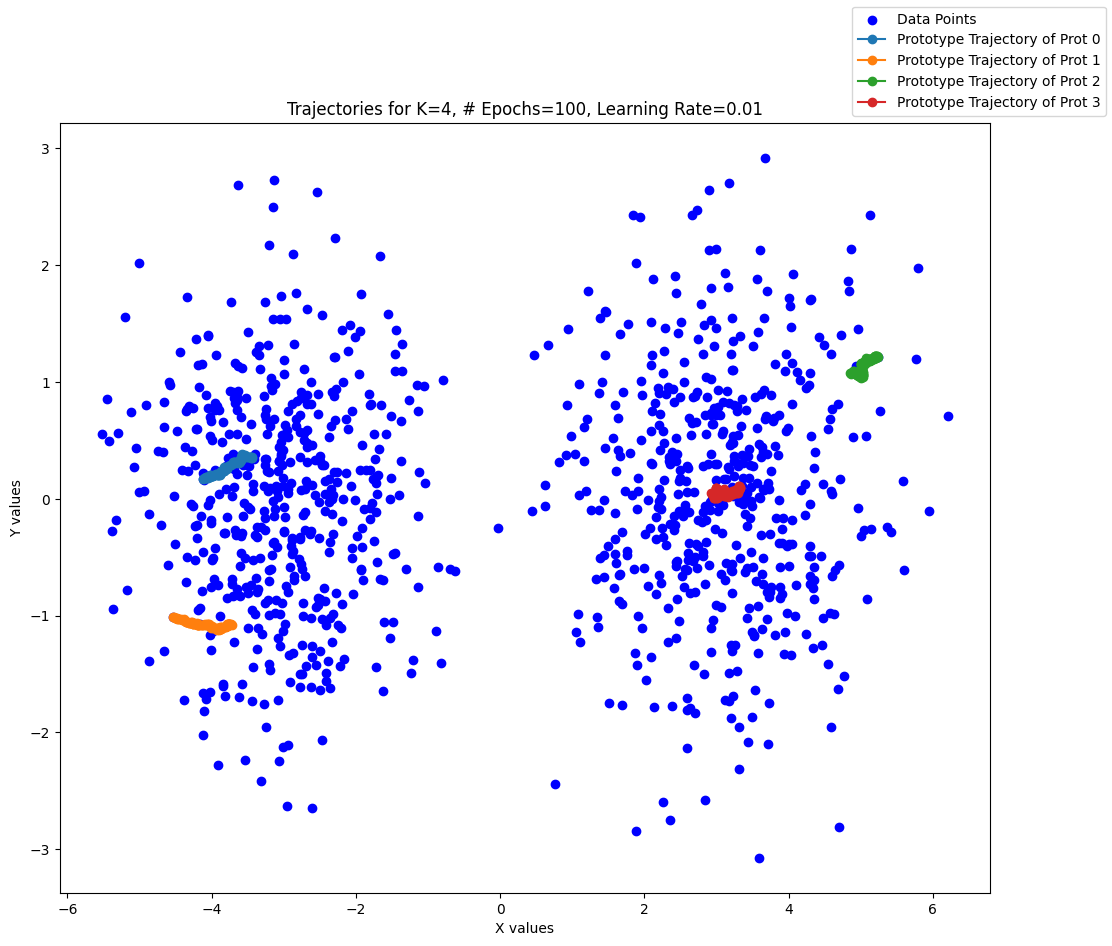

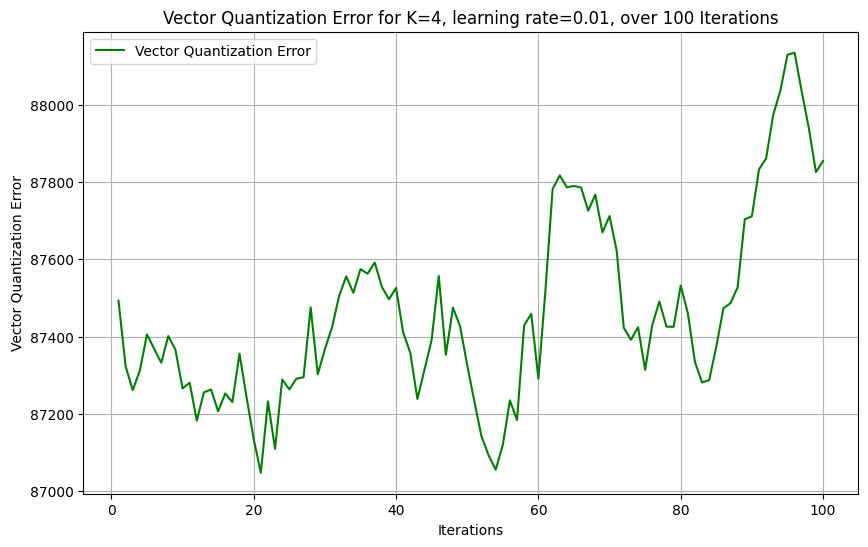

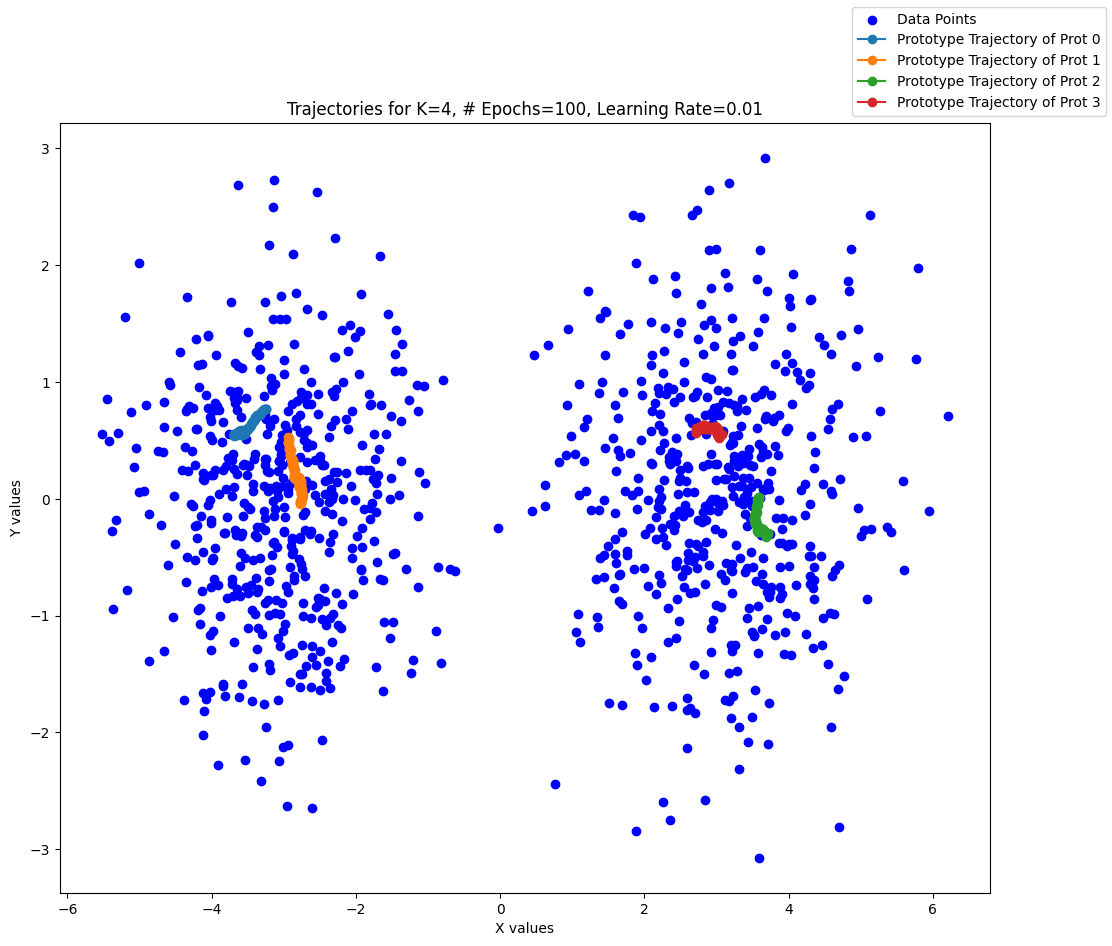

In [26]:
# learning curves

K=2
max_epochs=20
learning_rate = 0.10
trajs = VQ(prototype_no=K, learning_rate=learning_rate, max_epochs=max_epochs, data_array=data_array)
trajs

plot_trajectories(data_array, trajs, K, max_epochs, learning_rate)


K=2
max_epochs=100
learning_rate = 0.03
trajs = VQ(prototype_no=K, learning_rate=learning_rate, max_epochs=max_epochs, data_array=data_array)
trajs

plot_trajectories(data_array, trajs, K, max_epochs, learning_rate)

K=2
max_epochs=150
learning_rate = 0.01
trajs = VQ(prototype_no=K, learning_rate=learning_rate, max_epochs=max_epochs, data_array=data_array)
trajs

plot_trajectories(data_array, trajs, K, max_epochs, learning_rate)


K=4
max_epochs=100
learning_rate = 0.10
trajs = VQ(prototype_no=K, learning_rate=learning_rate, max_epochs=max_epochs, data_array=data_array)
trajs

plot_trajectories(data_array, trajs, K, max_epochs, learning_rate)

K=4
learning_rate = 0.03
trajs = VQ(prototype_no=K, learning_rate=learning_rate, max_epochs=max_epochs, data_array=data_array)
trajs

plot_trajectories(data_array, trajs, K, max_epochs, learning_rate)

K=4
learning_rate = 0.01
trajs = VQ(prototype_no=K, learning_rate=learning_rate, max_epochs=max_epochs, data_array=data_array)
trajs

plot_trajectories(data_array, trajs, K, max_epochs, learning_rate)




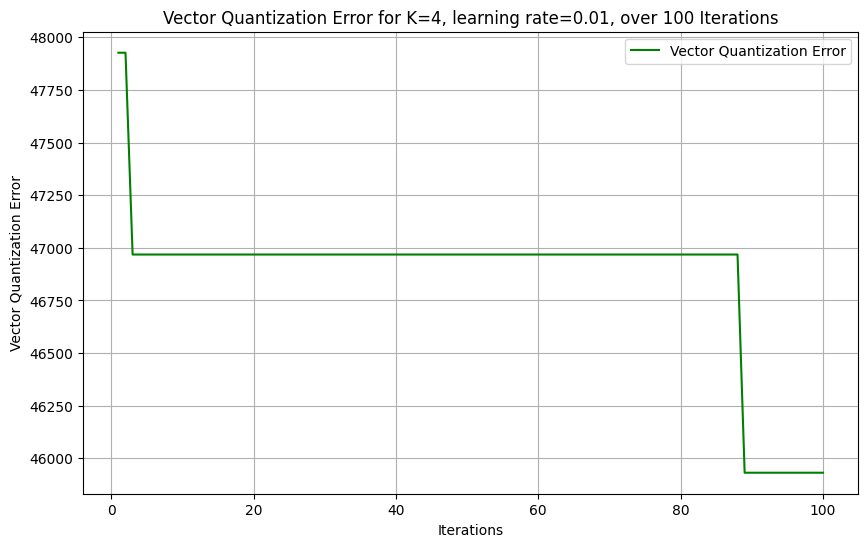

/var/folders/hr/622sc4x53h1457kksyx5ttk80000gn/T/ipykernel_53604/1060294380.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


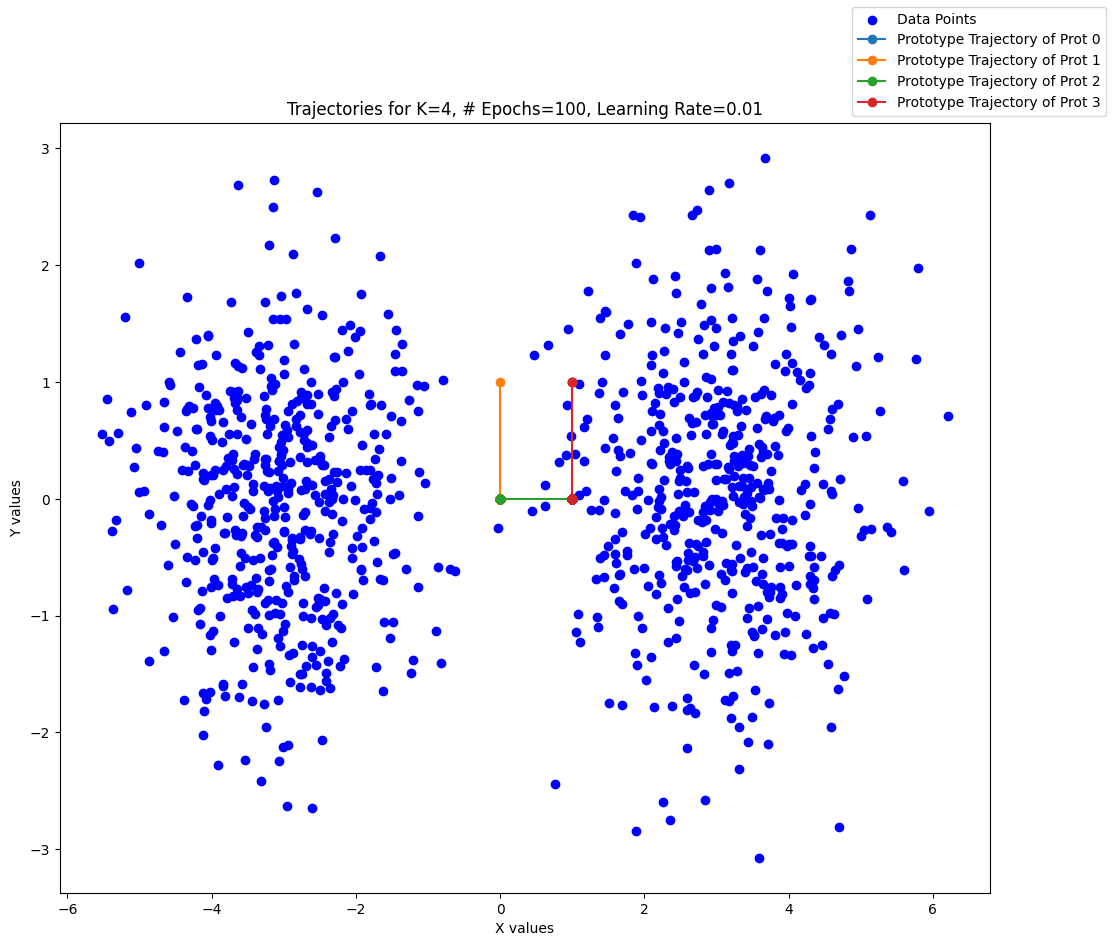

In [27]:

# stupid placement
K=4
learning_rate = 0.01
init_prototypes = np.array([[0,0],[0,1],[1,0],[1,1]])
trajs = VQ(prototype_no=K, learning_rate=learning_rate, max_epochs=max_epochs, data_array=data_array, initial_prototypes=init_prototypes)
trajs

plot_trajectories(data_array, trajs, K, max_epochs, learning_rate)